In [19]:
!pip install yfinance

[*********************100%***********************]  2 of 2 completed

               S&P 500     USD/JPY
Date                              
1996-10-30  114.180000  700.900024
1996-11-01  113.500000  703.770020
1996-11-04  113.879997  706.729980
1996-11-05  114.250000  714.140015
1996-11-06  113.949997  724.590027


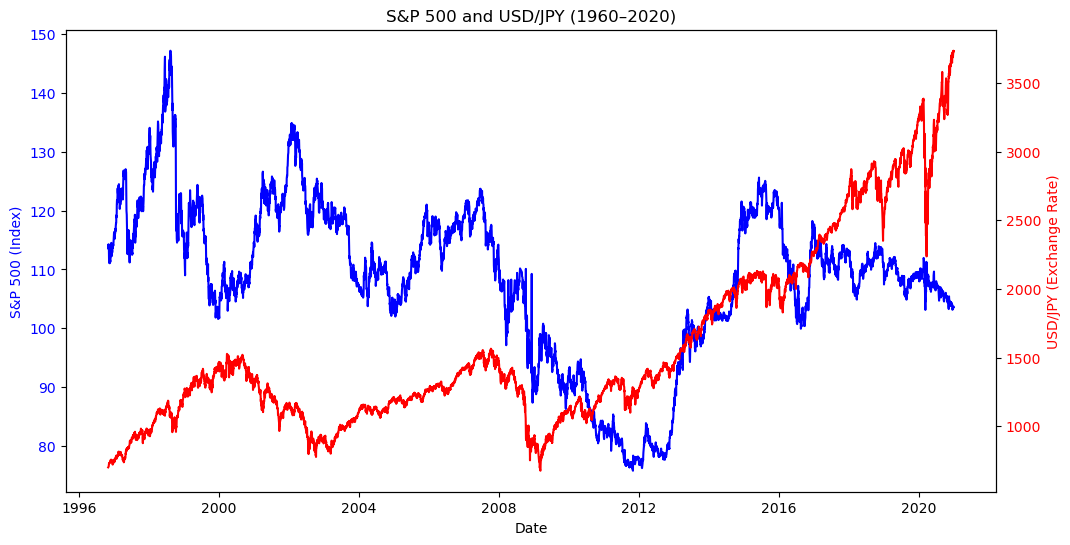

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

start_date = "1960-01-01"
end_date = "2020-12-31"

data = yf.download(["^GSPC", "JPY=X"], start=start_date, end=end_date, auto_adjust=False)

if "Adj Close" in data.columns.get_level_values(0):
    data = data["Adj Close"]
else:
    data = data["Close"]

data.columns = ["S&P 500", "USD/JPY"]

data = data.dropna()

print(data.head())

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(data.index, data["S&P 500"], color="blue", label="S&P 500")
ax1.set_xlabel("Date")
ax1.set_ylabel("S&P 500 (Index)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(data.index, data["USD/JPY"], color="red", label="USD/JPY")
ax2.set_ylabel("USD/JPY (Exchange Rate)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("S&P 500 and USD/JPY (1960–2020)")
plt.show()


In [3]:
data

S&P 500      USD/JPY
Date                               
1996-10-30  114.180000   700.900024
1996-11-01  113.500000   703.770020
1996-11-04  113.879997   706.729980
1996-11-05  114.250000   714.140015
1996-11-06  113.949997   724.590027
...                ...          ...
2020-12-23  103.533997  3690.010010
2020-12-24  103.552002  3703.060059
2020-12-28  103.532997  3735.360107
2020-12-29  103.689003  3727.040039
2020-12-30  103.558998  3732.040039

[6041 rows x 2 columns]

In [1]:
import yfinance as yf
import pandas as pd
import zipfile
import os

# -------------------------
# 1. Download the data
# -------------------------
start_date = "1960-01-01"
end_date = "2020-12-31"

tickers = {"^GSPC": "SP500", "JPY=X": "USDJPY"}

data_dict = {}
for ticker, name in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
    df = df[["Adj Close"]] if "Adj Close" in df.columns else df[["Close"]]
    df.rename(columns={"Adj Close": name, "Close": name}, inplace=True)
    data_dict[name] = df

# -------------------------
# 2. Save each to CSV
# -------------------------
output_dir = "market_data"
os.makedirs(output_dir, exist_ok=True)

csv_files = []
for name, df in data_dict.items():
    filename = f"{output_dir}/{name}.csv"
    df.to_csv(filename)
    csv_files.append(filename)

# -------------------------
# 3. Create a ZIP file
# -------------------------
zip_filename = "market_data.zip"
with zipfile.ZipFile(zip_filename, "w") as zf:
    for file in csv_files:
        zf.write(file)

print(f"✅ Created ZIP file: {zip_filename}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Created ZIP file: market_data.zip
